
# 미니 프로젝트 3
### 초기화

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 데이터셋 정리

In [2]:
train = pd.read_csv('kc_house_data_train.csv')
test = pd.read_csv('kc_house_data_test.csv')

#밑에서 기본 특성만 가지고도 CV 돌려보기 위함
basic_key = train.columns.difference(['ix', 'id', 'date', 'price'])

# 필요없는 줄 제거
train = train.drop(['ix', 'id'], axis=1)
test = test.drop(['ix', 'id'], axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 20 columns):
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 2.6+ MB


In [3]:
pd.options.display.float_format = '{:.4f}'.format
train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.377680e+05,3.368132,2.113794,2073.894910,1.479895e+04,1.499161,0.007172,0.233025,3.407577,7.653846,1785.962175,287.932736,1971.108329,83.003412,98077.974378,47.560330,-122.214139,1982.904569,12725.059341
std,3.614639e+05,0.931385,0.766790,907.297963,3.883925e+04,0.542819,0.084385,0.761749,0.651698,1.170355,821.626290,438.727110,29.435603,398.503250,53.326084,0.138432,0.140498,681.232425,27525.258285
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,3.201500e+05,3.000000,1.500000,1430.000000,5.001250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.472000,-122.329000,1480.000000,5083.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7615.000000
75%,6.400000e+05,4.000000,2.500000,2540.000000,1.060675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,550.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10046.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
#date 특성 쪼개기
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

train['year'] = train['date'].apply(lambda x: x.year)
train['month'] = train['date'].apply(lambda x: x.month)
train['dow'] = train['date'].apply(lambda x: x.dayofweek)
test['year'] = test['date'].apply(lambda x: x.year)
test['month'] = test['date'].apply(lambda x: x.month)
test['dow'] = test['date'].apply(lambda x: x.dayofweek)

train.drop(['date'], axis=1, inplace=True)
test.drop(['date'], axis=1, inplace=True)

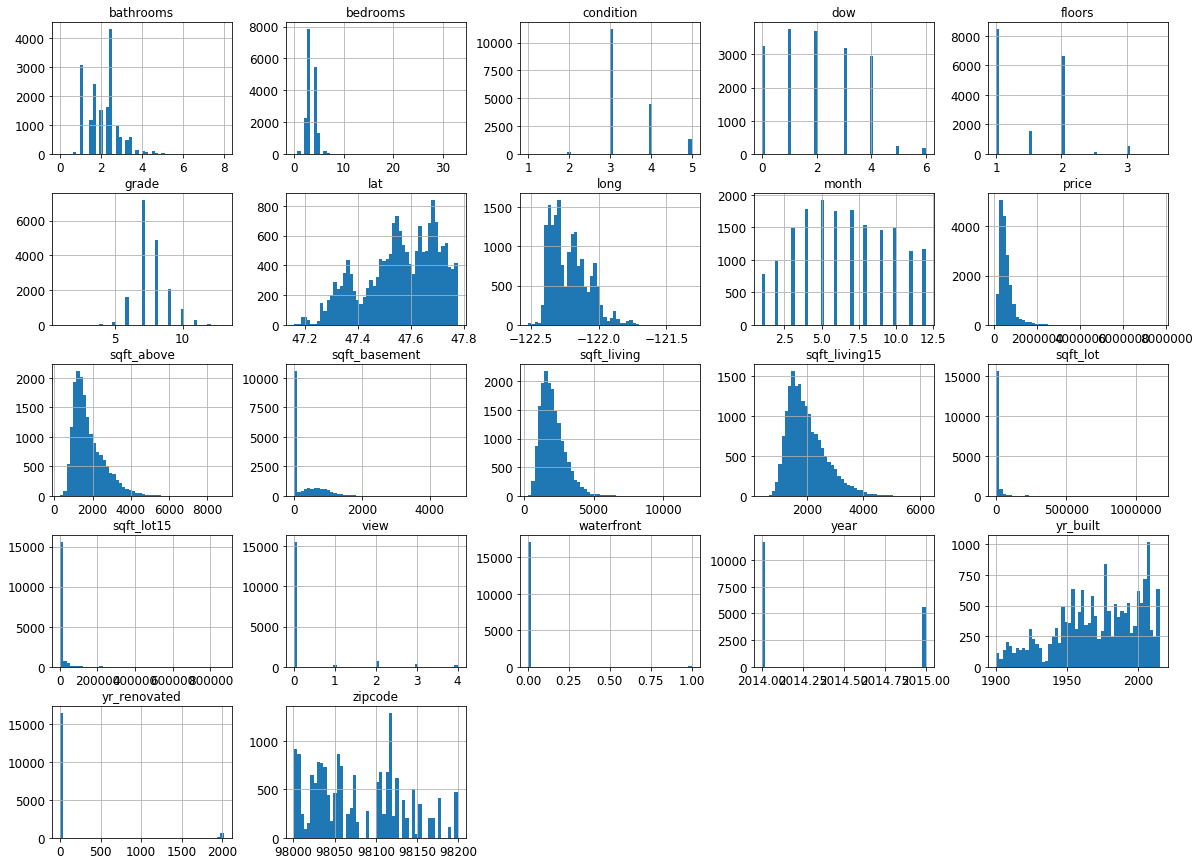

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
#attribute_histogram_plots
plt.show()

##### train.keys
price  bedrooms  bathrooms  sqft_living  sqft_lot  floors 
waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  yr_renovated
zipcode   lat    long  sqft_living15  sqft_lot15  year  month  dow

## BoxPlot

 피어쓴의 r은 흩어진 정도만 보기 때문에 위치를 보기 힘들다는 것을 깨달았다.
 -> 검색해보니 boxplot이 흩어진 정도(어디에 흩어진지)를 보기 좋다고 하고 많이들 쓰길래 써보았다.
 
(결과가 너무 좁은것은 산점도로 돌림.)
사용을 못한다 -> 특성조합에 사용을 해도 영향이 별로 없을것 같다는 의미

돌리실 때 너무 많을까봐 예시로 한개만 남겨놓고 Raw NBConvert 버전으로 했습니다!

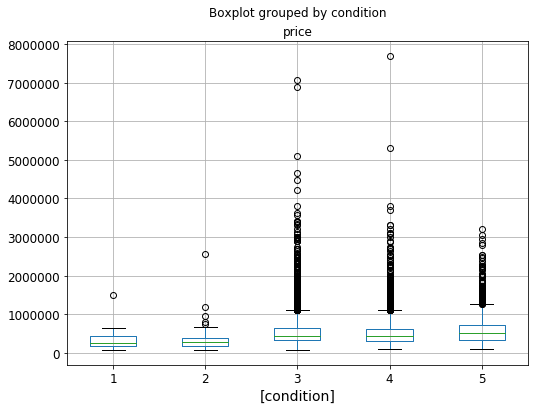

In [6]:
train.boxplot(column=['price'], by=['condition'], figsize=(8,6))
plt.show()

## 산점도

돌리실 때 너무 많을까봐 예시로 한두개만 남겨놓고 Raw NBConvert 버전으로 했습니다!

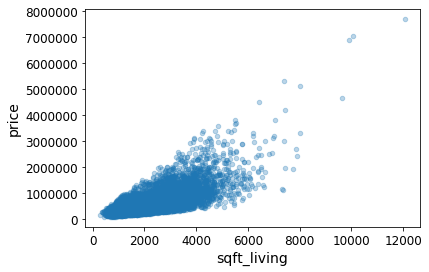

In [7]:
train.plot(kind="scatter", x="sqft_living", y="price", alpha=0.3)
plt.show()

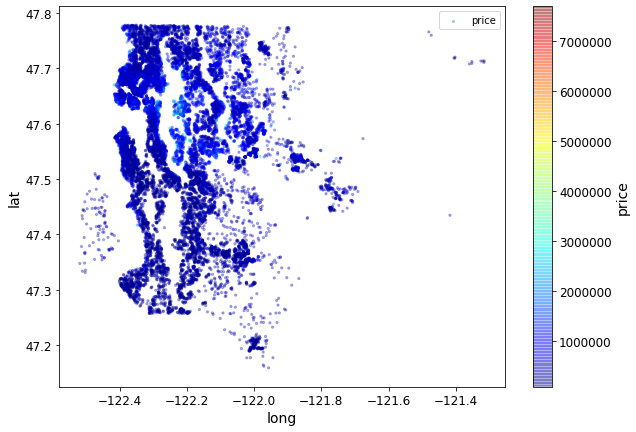

In [8]:
train.plot(kind="scatter", x="long", y="lat", alpha=0.3,
    s=5, label="price", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
#train_price_scatterplot

## 특성조합

꿀팁: 변수이름 쓰기 귀찮을때 아두이노 프로그램에 복붙해서 ctrl+F 변수 모두 바꾸기 하면 편함

In [9]:
# 1번: 최근 건축년도 특성만들기 train, test
train["yr_built_last"] = train["yr_built"]
for i in range(len(train.yr_renovated)):
    if train.loc[i,"yr_renovated"] > train.loc[i,"yr_built"]:
        train.loc[i,"yr_built_last"] = train.loc[i,"yr_renovated"]
test["yr_built_last"] = test["yr_built"]
for i in range(len(test.yr_renovated)):
    if test.loc[i,"yr_renovated"] > test.loc[i,"yr_built"]:
        test.loc[i,"yr_built_last"] = test.loc[i,"yr_renovated"]
#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
train[["yr_built", "yr_renovated", "yr_built_last"]].head()

,yr_built,yr_renovated,yr_built_last
0,1983,0,1983
1,1929,0,1929
2,1942,0,1942
3,1977,0,1977
4,2007,0,2007


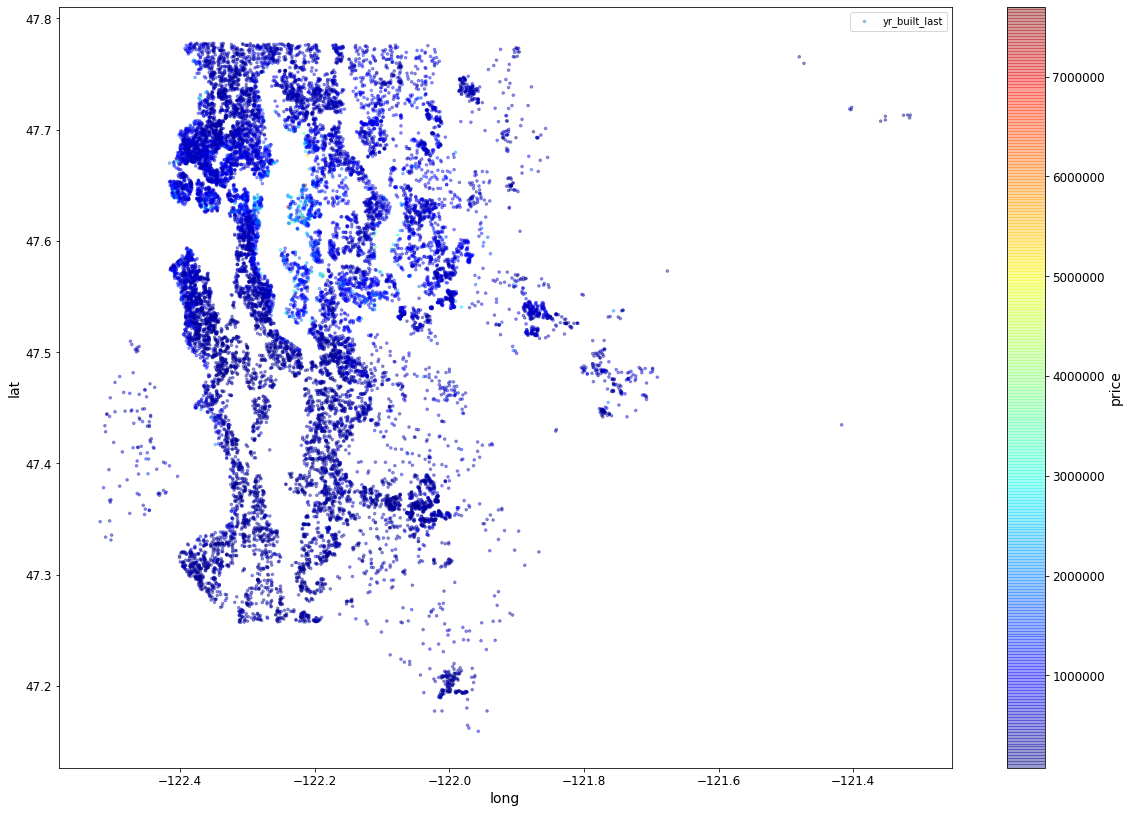

In [10]:
train.plot(kind="scatter", x="long", y="lat", alpha=0.4,
    s=train["yr_built_last"]/300, label="yr_built_last", figsize=(20,14),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
# train_yr_built_last_scatterplot

In [11]:
# 2번: 지어지고 리모델링된 건물이 팔리는 기간

train["year_sub_yr_built_last"] = train["year"]-train["yr_built_last"]
test["year_sub_yr_built_last"] = test["year"]-test["yr_built_last"]

D:\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


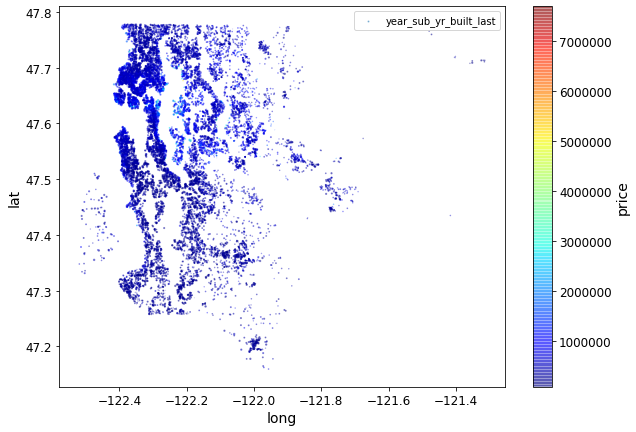

In [12]:
train.plot(kind="scatter", x="long", y="lat", alpha=0.4,
    s=train["year_sub_yr_built_last"]/50, label="year_sub_yr_built_last", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
# train_year_sub_yr_built_last_scatterplot
# figsize가 적합한 사이즈가 아니면 경고가 뜨기도 함!

In [13]:
# 3번: 전체면적(내부+땅) 특성만들기
train["sqft_whole"] = train["sqft_living"] + train["sqft_lot"]
test["sqft_whole"] = test["sqft_living"] + test["sqft_lot"]

In [14]:
# 4번: 전체 방의 수(침실+욕실) 특성만들기
train["room_whole"] = train["bedrooms"] + train["bathrooms"]
test["room_whole"] = test["bedrooms"] + test["bathrooms"]

In [15]:
# 5번: 땅면적에 대한 방(전체방, 침실, 욕실) 평균
train["mean_area_lot_room_whole"] = train["sqft_lot"] / (train["room_whole"])
train["mean_area_lot_bed_room"] = train["sqft_lot"] / (train["bedrooms"])
train["mean_area_lot_bath_room"] = train["sqft_lot"] / (train["bathrooms"])
test["mean_area_lot_room_whole"] = test["sqft_lot"] / (test["room_whole"])
test["mean_area_lot_bed_room"] = test["sqft_lot"] / (test["bedrooms"])
test["mean_area_lot_bath_room"] = test["sqft_lot"] / (test["bathrooms"])

In [16]:
# 6번: 침실에 대한 욕실 비율
train["room_ratio"] = train["bedrooms"] / train["bathrooms"]
test["room_ratio"] = test["bedrooms"] / test["bathrooms"]

In [17]:
# 7번: 주위 15가구내부면적에 대한 내부/땅/위층/지하 면적 비율
#sqft_lot_lot15_ratio == sqft_lot_per_sqft_lot15
train["sqft_lot_lot15_ratio"] = train["sqft_lot"] / train["sqft_lot15"]
train["sqft_living_lot15_ratio"] = train["sqft_living"] / train["sqft_lot15"]
train["sqft_above_lot15_ratio"]= train["sqft_above"] / train["sqft_lot15"]
train["sqft_basement_lot15_ratio"] = train["sqft_basement"] / train["sqft_lot15"]
test["sqft_lot_lot15_ratio"] = test["sqft_lot"] / test["sqft_lot15"]
test["sqft_living_lot15_ratio"] = test["sqft_living"] / test["sqft_lot15"]
test["sqft_above_lot15_ratio"]= test["sqft_above"] / test["sqft_lot15"]
test["sqft_basement_lot15_ratio"] = test["sqft_basement"] / test["sqft_lot15"]

In [18]:
# 8번: 주위 15가구 땅면적(외부)에 대한 내부/땅/위층/지하 면적 비율
#sqft_lot_living15_ratio == sqft_lot_per_sqft_living15
train["sqft_lot_living15_ratio"] = train["sqft_lot"] / train["sqft_living15"]
train["sqft_living_living15_ratio"]= train["sqft_living"] / train["sqft_living15"]
train["sqft_above_living15_ratio"] = train["sqft_above"] / train["sqft_living15"]
train["sqft_basement_living15_ratio"] = train["sqft_basement"] / train["sqft_living15"]
test["sqft_lot_living15_ratio"] = test["sqft_lot"] / test["sqft_living15"]
test["sqft_living_living15_ratio"]= test["sqft_living"] / test["sqft_living15"]
test["sqft_above_living15_ratio"] = test["sqft_above"] / test["sqft_living15"]
test["sqft_basement_living15_ratio"] = test["sqft_basement"] / test["sqft_living15"]

In [19]:
# 9번: 층수에 대한 내부/땅/위층/지하 면적 비율
train["sqft_lot_floor_ratio"] = train["sqft_lot"] / train["floors"]
train["sqft_living_floor_ratio"]= train["sqft_living"] / train["floors"]
train["sqft_above_floor_ratio"] = train["sqft_above"] / train["floors"]
train["sqft_basement_floor_ratio"] = train["sqft_basement"] / train["floors"]
test["sqft_lot_floor_ratio"] = test["sqft_lot"] / test["floors"]
test["sqft_living_floor_ratio"]= test["sqft_living"] / test["floors"]
test["sqft_above_floor_ratio"] = test["sqft_above"] / test["floors"]
test["sqft_basement_floor_ratio"] = test["sqft_basement"] / test["floors"]

In [20]:
# 10번: 구조설계에 대한 내부/땅/위층/지하 면적 비율
train["sqft_lot_grade_ratio"] = train["sqft_lot"] / train["grade"]
train["sqft_living_grade_ratio"]= train["sqft_living"] / train["grade"]
train["sqft_above_grade_ratio"] = train["sqft_above"] / train["grade"]
train["sqft_basement_grade_ratio"] = train["sqft_basement"] / train["grade"]
test["sqft_lot_grade_ratio"] = test["sqft_lot"] / test["grade"]
test["sqft_living_grade_ratio"]= test["sqft_living"] / test["grade"]
test["sqft_above_grade_ratio"] = test["sqft_above"] / test["grade"]
test["sqft_basement_grade_ratio"] = test["sqft_basement"] / test["grade"]

## 피어쓴의 r

In [21]:
from pandas.plotting import scatter_matrix

In [22]:
corr_matrix = train.corr()
corr_matrix["price"].sort_values(ascending=False)

price                           1.000000
sqft_living                     0.701701
grade                           0.665093
sqft_above                      0.603255
sqft_living15                   0.582667
sqft_living_grade_ratio         0.550246
bathrooms                       0.526618
room_whole                      0.466726
sqft_above_floor_ratio          0.440814
sqft_above_grade_ratio          0.440086
sqft_living_floor_ratio         0.431748
view                            0.392108
sqft_basement                   0.321387
lat                             0.310770
bedrooms                        0.308262
sqft_living_living15_ratio      0.299054
floors                          0.253425
waterfront                      0.252946
sqft_basement_grade_ratio       0.235354
sqft_basement_floor_ratio       0.215693
sqft_above_living15_ratio       0.201522
sqft_basement_lot15_ratio       0.199957
sqft_living_lot15_ratio         0.174104
sqft_basement_living15_ratio    0.172719
yr_renovated    

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 46 columns):
price                           17290 non-null float64
bedrooms                        17290 non-null int64
bathrooms                       17290 non-null float64
sqft_living                     17290 non-null int64
sqft_lot                        17290 non-null int64
floors                          17290 non-null float64
waterfront                      17290 non-null int64
view                            17290 non-null int64
condition                       17290 non-null int64
grade                           17290 non-null int64
sqft_above                      17290 non-null int64
sqft_basement                   17290 non-null int64
yr_built                        17290 non-null int64
yr_renovated                    17290 non-null int64
zipcode                         17290 non-null int64
lat                             17290 non-null float64
long                            172

## 교차검증: 여러 알고리즘 쓰기
#### 중요특성 뽑기 - RF reg - Linear reg - SVR

In [24]:
from sklearn.model_selection import cross_val_score

#RMSEs: 알고리즘 결과들 넣을 곳
RMSEs = {}

train.replace(np.inf, -1, inplace=True)
train.replace(-np.inf, -1, inplace=True)
train.replace(np.nan, -1, inplace=True)

test.replace(np.inf, -1, inplace=True)
test.replace(-np.inf, -1, inplace=True)
test.replace(np.nan, -1, inplace=True)

# -1로 바꾸면 랜덤포레스트때 알아서 처리된다고 함
# -> 트리라서 그렇다고 합니다.
#pd.options.display.float_format = '{:.10f}'.format

X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop('price', axis=1)
y_test = test['price']

In [25]:
%%time
# 기본 특성만 가지고
from sklearn.ensemble import RandomForestRegressor
forest_clf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(forest_clf, X_train[basic_key], y_train, cv=10, scoring='neg_mean_squared_error')
scores = [round((-score)**0.5, 2) for score in scores]
RMSEs['RF_basic'] = sum(scores)/10
print("RMSE: ", scores)

RMSE:  [125191.83, 160662.44, 118470.13, 139901.61, 118027.28, 131240.46, 116131.61, 119864.87, 124835.5, 120896.72]
Wall time: 1min 36s


In [26]:
%%time
# 추가특성들도
from sklearn.ensemble import RandomForestRegressor
forest_clf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores = [round((-score)**0.5, 2) for score in scores]
RMSEs['RF_add'] = sum(scores)/10
print("RMSE: ", scores)

RMSE:  [130631.55, 168005.67, 122598.88, 143989.64, 121519.29, 134284.58, 117307.24, 122282.96, 126065.3, 122458.07]
Wall time: 4min 40s


In [27]:
condition_dummy = pd.get_dummies(X_train.condition, drop_first=True, prefix="condition")
view_dummy = pd.get_dummies(X_train.view, drop_first=True, prefix="view")
X_train_dummy = pd.concat([X_train, condition_dummy, view_dummy], axis=1)

# https://rfriend.tistory.com/tag/pd.get_dummies%28%29%20%EB%A5%BC%20%EC%9D%B4%EC%9A%A9%ED%95%B4%20%EA%B0%80%EB%B3%80%EC%88%98%28dummy%20var%29%20%EB%A7%8C%EB%93%A4%EA%B8%B0
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [28]:
%%time
# 더미 추가
from sklearn.ensemble import RandomForestRegressor
forest_clf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(forest_clf, X_train_dummy, y_train, cv=10, scoring='neg_mean_squared_error')
scores = [round((-score)**0.5, 2) for score in scores]
RMSEs['RF_dummy'] = sum(scores)/10
print("RMSE: ", scores)

RMSE:  [131114.75, 171286.97, 122329.64, 143636.43, 121208.77, 135267.58, 115225.62, 121741.1, 124099.4, 121987.29]
Wall time: 4min 49s


In [29]:
%%time
forest_clf_for_var_select = RandomForestRegressor(n_estimators=100, random_state=42)
forest_clf_for_var_select.fit(X_train_dummy, y_train)

#random forest feature select
n_features = 15
important_features = pd.Series(forest_clf_for_var_select.feature_importances_, index=X_train_dummy.columns).sort_values(ascending=False).head(n_features)
print("상위 %s개 feature 선택: %.4f의 importance를 가짐"%(n_features, important_features.sum()))      

X_train_top_features = X_train_dummy[important_features.index]
print("이하의 특성들이 선택됨")
print(important_features)

#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

상위 15개 feature 선택: 0.9188의 importance를 가짐
이하의 특성들이 선택됨
grade                     0.3121090004
sqft_living               0.2570332267
lat                       0.1461114958
long                      0.0577074774
waterfront                0.0307430941
yr_built                  0.0256098170
sqft_living15             0.0236574148
zipcode                   0.0122431338
sqft_living_grade_ratio   0.0122061198
sqft_above                0.0099904692
bathrooms                 0.0081257160
view                      0.0070435483
sqft_above_floor_ratio    0.0062518779
sqft_lot15                0.0051119569
sqft_living_floor_ratio   0.0048144840
dtype: float64
Wall time: 32.8 s


In [30]:
%%time
# 중요도 높은 특성 선택한 걸로 돌려보기 1
from sklearn.ensemble import RandomForestRegressor
forest_clf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(forest_clf, X_train_top_features, y_train, cv=10, scoring='neg_mean_squared_error')
scores = [round(np.sqrt(-score), 2) for score in scores]
print("RMSE: ", scores)
RMSEs['RF_top_features'] = sum(scores)/10

RMSE:  [124488.84, 162564.65, 120748.07, 141575.38, 119493.97, 131331.12, 116881.06, 119521.68, 124294.75, 121041.16]
Wall time: 1min 35s


In [31]:
%%time
# 중요도 높은 특성 선택한 걸로 돌려보기 2
#LinearRegression
from sklearn.linear_model import LinearRegression
reg_clf = LinearRegression()
scores = cross_val_score(reg_clf, X_train_top_features, y_train, cv=10, scoring='neg_mean_squared_error')
scores = [round(np.sqrt(-score), 2) for score in scores]
RMSEs['reg_top_features'] = sum(scores)/10
print("RMSE: ", scores)

RMSE:  [180858.85, 225790.16, 175880.78, 197427.17, 173744.17, 195571.76, 177443.15, 178142.86, 182183.5, 180528.73]
Wall time: 126 ms


In [32]:
%%time
# 중요도 높은 특성 선택한 걸로 돌려보기 3
#SVR
from sklearn.svm import SVR
svr_clf = SVR(gamma="auto")
scores = cross_val_score(svr_clf, X_train_top_features, y_train, cv=10, scoring='neg_mean_squared_error')
scores = [round(np.sqrt(-score), 2) for score in scores]
RMSEs['SVR_top_features'] = sum(scores)/10
print("RMSE: ", scores)

RMSE:  [363362.71, 437908.14, 348858.3, 401656.4, 345168.04, 398715.22, 350664.95, 370172.96, 352825.7, 337784.17]
Wall time: 2min 45s


In [33]:
print("RMSE 요약")
RMSEs

RMSE 요약


{'RF_basic': 127522.245,
 'RF_add': 130914.31800000001,
 'RF_dummy': 130789.755,
 'RF_top_features': 128194.06799999997,
 'reg_top_features': 186757.11299999998,
 'SVR_top_features': 370711.6590000001}

In [34]:
print("best performance")       #최고 성능
top_model = min(RMSEs, key=RMSEs.get)
top_model, RMSEs[top_model]

best performance


('RF_basic', 127522.245)

## RMSE 측정

In [35]:
train.replace(np.inf, -1, inplace=True)
train.replace(-np.inf, -1, inplace=True)
train.replace(np.nan, -1, inplace=True)

test.replace(np.inf, -1, inplace=True)
test.replace(-np.inf, -1, inplace=True)
test.replace(np.nan, -1, inplace=True)

#-1로 바꾸면 랜덤포레스트때 알아서 처리된다고 함 -> 트리라서 그렇다고 합니다.
pd.options.display.float_format = '{:.0f}'.format

In [36]:
X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop('price', axis=1)
y_test = test['price']

In [37]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_clf = RandomForestRegressor(n_estimators=100, random_state=42)
#제한 주면 rmse 더 올라감..ㅠㅠㅠ
forest_clf.fit(X_train, y_train)

train_pred = forest_clf.predict(X_train)
rmse = np.sqrt(mean_squared_error(train_pred, y_train))
print("Train rmse: %.4f"%rmse)

Train rmse: 48035.9348
Wall time: 32 s


In [38]:
test_pred = forest_clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(test_pred, y_test))
print("Test rmse: %.4f"%rmse)

Test rmse: 154564.8260
